In [2384]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


### Згенерувати вибірку заданого об’єму (не менше 50) з вказаного проміжку для дискретної статистичної змінної.


In [2385]:
def create_sample(size, start, end):
    import random
    return [random.randint(start, end) for _ in range(size)]

# sample = create_sample(20, 1, 10)
sample = [5,5,6,6,7,7,7,7,8,10,10,10,10,10,11,11,11,11,11,12,12,12,13,14,14,15,15,15,15,15,16,16,17,17,18,18,19,19,20,20,20,21,22,22,23,23,23,25,25,25]
sample

[5,
 5,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 13,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 19,
 20,
 20,
 20,
 21,
 22,
 22,
 23,
 23,
 23,
 25,
 25,
 25]

# Завдання 1 (Дискретний розподіл:)

## Побудувати варіаційний ряд


In [2386]:

def generate_variation_series(sample):
    return sorted(sample)

variation_series = generate_variation_series(sample)
variation_series

[5,
 5,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 13,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 19,
 20,
 20,
 20,
 21,
 22,
 22,
 23,
 23,
 23,
 25,
 25,
 25]

## Побудувати частотну таблицю пандасом


In [2387]:
def generate_frequency_table(variation_series):
    frequency_table = {}
    for i in variation_series:
        if i in frequency_table:
            frequency_table[i] += 1
        else:
            frequency_table[i] = 1
    return frequency_table

frequency_table = generate_frequency_table(variation_series)
frequency_table = pd.DataFrame(list(frequency_table.items()), columns=['x[i]', 'y[i]']).set_index('x[i]')
frequency_table








,y[i]
x[i],
5,2
6,2
7,4
8,1
10,5
11,5
12,3
13,1
14,2


## Представити графічно статистичний матеріал


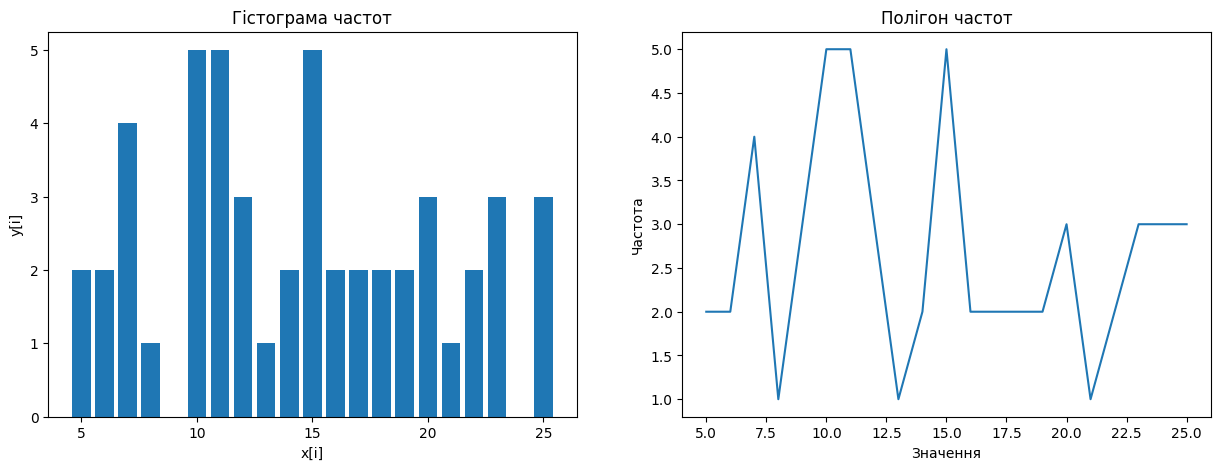

In [2388]:
def draw_statistical_material(frequency_table):
    _, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 5))
    ax1.bar(frequency_table.index, frequency_table['y[i]'])
    ax1.set_xlabel('x[i]')
    ax1.set_ylabel('y[i]')
    ax1.set_title('Гістограма частот')

    ax2.plot(frequency_table.index, frequency_table['y[i]'])
    ax2.set_xlabel('Значення')
    ax2.set_ylabel('Частота')
    ax2.set_title('Полігон частот')
    plt.show()

draw_statistical_material(frequency_table)



## побудувати графік емпіричної функції розподілу;


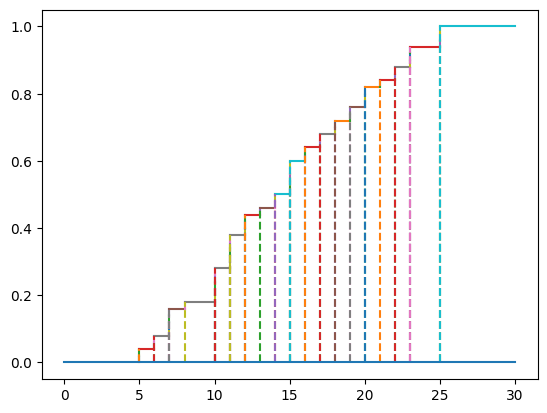

In [2389]:
cumulative_frequencies = [i/len(sample) for i in range(1, len(sample) + 1)]

def show_plot(values, cumulative_probs):
    # Побудова першої точки
    plt.plot([values[0]]*2, [0, cumulative_probs[0]])

    # Побудова горизонтальних сегментів для емпіричного розподілу
    for i in range(1, len(values)):
        plt.plot([values[i-1], values[i]], [cumulative_probs[i-1], cumulative_probs[i-1]])
        plt.plot([values[i], values[i]], [cumulative_probs[i-1], cumulative_probs[i]])

    # Продовження лінії вправо
    plt.plot([values[-1], values[-1]+5], [cumulative_probs[-1], cumulative_probs[-1]])

    # Побудова вертикальних штрихованих ліній на кожному значенні
    for i in range(len(values)):
        plt.plot([values[i]]*2, [0, cumulative_probs[i]], linestyle='dashed')

    # Побудова осі x
    plt.plot([0, values[-1]+5], [0, 0])

    plt.show()

show_plot(variation_series, cumulative_frequencies)


## обчислити числові характеристики дискретного розподілу.

In [2390]:
# 4. обчислити числові характеристики дискретного розподілу.
#медіана
def find_median(a):
    a_len = len(a)
    return (a[int((a_len-1)/2)] + a[int(a_len/2)]) / 2

#мода
def find_moda(counts, distinct_v):
    to_return = []
    for i in range(len(counts)):
        if counts[i] == np.max(counts):
            to_return.append(distinct_v[i])
    return to_return

#вибіркове середнє
def average_(distinct_v, counts):
    to_return = 0
    for i in range(len(distinct_v)):
        to_return += (distinct_v[i] * counts[i])
    return to_return/sum_(counts)

#розмах
def scope(distinct_v):
    return np.max(distinct_v) - np.min(distinct_v)

# об'єм
def sum_(lst):
    to_return = 0
    for i in lst:
        to_return += i
    return to_return

#девіація
def deviation(distinct_v, counts):
    to_return = 0
    avg = average_(distinct_v, counts)
    for i in range(len(distinct_v)):
        to_return += (((distinct_v[i] - avg) ** 2) * counts[i])
    return to_return

#варіанса
def variance(distinct_v, counts):
    return deviation(distinct_v, counts)/(sum_(counts)-1)

#стандарт
def standart(distinct_v, counts):
    return math.sqrt(variance(distinct_v, counts))

#варіація
def variation(distinct_v, counts):
    return standart(distinct_v, counts) / average_(distinct_v, counts)

#вибіркова дисперсія
def selective_dispersion(distinct_v, counts):
    return deviation(distinct_v, counts)/sum_(counts)

#вибіркове середнє квадратичне відхилення
def selective_average_quadratic_deviation(distinct_v, counts):
    return math.sqrt(selective_dispersion(distinct_v, counts))

#центральний момент k-того порядку
def m_k(k, distinct_v, counts):
    to_return = 0
    _avg = average_(distinct_v, counts)
    for i in range(len(distinct_v)):
        to_return += ((distinct_v[i] - _avg) ** k) * counts[i]
    return to_return/sum_(counts)

# асиметрія
def asymetry(distinct_v, counts):
    return m_k(3, distinct_v, counts) / (m_k(2, distinct_v, counts) ** (3/2))

# ексцес
def excess(distinct_v, counts):
    return m_k(4, distinct_v, counts) / (m_k(2, distinct_v, counts) ** (2)) - 3

def print_characteristics(distinct_values, counts):
    print("\nЧислові характеристики:")
    print("Медіана: " + str(find_median(distinct_values)))
    print("Мода: " + str(find_moda(counts, distinct_values)))
    print("Вибіркове середнє значення: " + str(average_(distinct_values, counts)))
    print("Розмах: " + str(scope(distinct_values)))
    print("Девіація: " + str(deviation(distinct_values, counts)))
    print("Варіанса: " + str(variance(distinct_values, counts)))
    print("Стандарт: " + str(standart(distinct_values, counts)))
    print("Варіація: " + str(variation(distinct_values, counts)))
    print("Вибіркова дисперсія: " + str(selective_dispersion(distinct_values, counts)))
    print("Вибіркове середнє квадратичне відхилення: " + str(selective_average_quadratic_deviation(distinct_values, counts)))
    print("Центральний момент другого порядку: " + str(m_k(2, distinct_values, counts)))
    print("Центральний момент третього порядку: " + str(m_k(3, distinct_values, counts)))
    print("Центральний момент четвертого порядку: " + str(m_k(4, distinct_values, counts)))
    print("Асиметрія: " + str(asymetry(distinct_values, counts)))
    print("Ексцес: " + str(excess(distinct_values, counts)))

print_characteristics(np.array(list(frequency_table.index)), np.array(list(frequency_table['y[i]'])))





Числові характеристики:
Медіана: 15.0
Мода: [10, 11, 15]
Вибіркове середнє значення: 14.48
Розмах: 20
Девіація: 1652.4799999999998
Варіанса: 33.72408163265305
Стандарт: 5.807243892988571
Варіація: 0.40105275504064714
Вибіркова дисперсія: 33.0496
Вибіркове середнє квадратичне відхилення: 5.7488781514309375
Центральний момент другого порядку: 33.0496
Центральний момент третього порядку: 34.25798399999997
Центральний момент четвертого порядку: 2168.4038195199996
Асиметрія: 0.1803069598548387
Ексцес: -1.0147840837943793


## Квантилі

In [2391]:
def calculate_deciles(a):
    if len(a) % 10 == 0:
        return [a[int(len(a) / 10 * (i + 1))] for i in range(9)]
    else:
        return []

def get_deciles(a):
    deciles = calculate_deciles(a)
    if deciles:
        print(f"Децилі: {deciles}")
        print(f"Інтердецильна широта: {deciles[-1] - deciles[0]}\n")
    
get_deciles(variation_series)


Децилі: [7, 10, 11, 12, 15, 16, 18, 20, 23]
Інтердецильна широта: 16



# Завдання 2 (Неперервний розподіл)

In [2392]:
# Згенерувати вибірку заданого обʼєму (не менше 50) з вказаного проміжку для неперервної статистичної змінної. На підставі отриманих вибіркових даних:
# 1.утворити інтервальний статистичний розподіл
# 2.побудувати гістограму та графік емпіричної функції розподілу
# 3. обчислити числові характеристики.

## Утворити інтервальний статистичний розподіл

In [2393]:
def create_continuous_distribution(lst):
    r = math.floor(math.log2(len(set(lst)))) # Кількість інтервалів
    bins = np.linspace(min(lst), max(lst), r+1)
    counts, intervals = np.histogram(lst, bins=bins)

    df = pd.DataFrame({
        'Interval': [pd.Interval(left=intervals[i], right=intervals[i+1], closed='both') for i in range(len(intervals)-1)],
        'Count': counts
    })

    return df

continuous_distribution = create_continuous_distribution(variation_series)
continuous_distribution



,Interval,Count
0,"[5.0, 10.0]",9
1,"[10.0, 15.0]",16
2,"[15.0, 20.0]",13
3,"[20.0, 25.0]",12


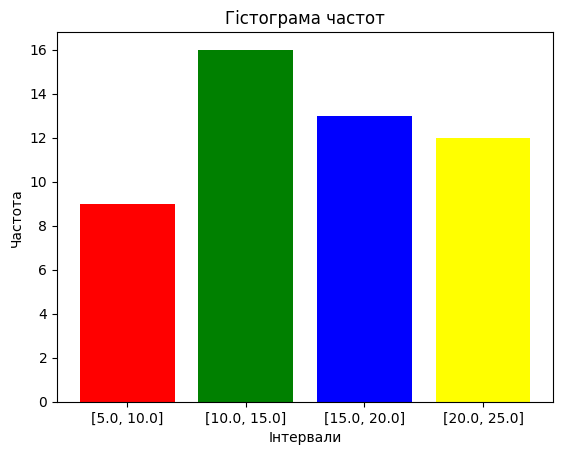

In [2394]:
def draw_continuous_distribution(continuous_distribution):
    plt.bar([str(interval) for interval in continuous_distribution['Interval']], continuous_distribution['Count'], color=['red', 'green', 'blue', 'yellow', 'orange'])
    plt.xlabel('Інтервали')
    plt.ylabel('Частота')
    plt.title('Гістограма частот')
    plt.show()

draw_continuous_distribution(continuous_distribution)





## Графік емпіричної функції розподілу

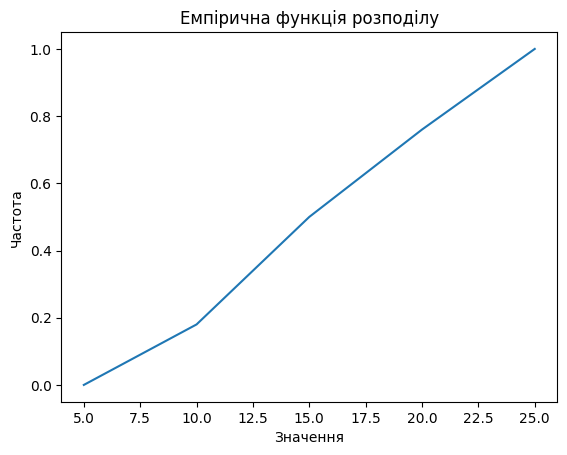

In [2395]:
def plot_empirical_distribution(df, min_value):
    intervals = [min_value] + df['Interval'].apply(lambda x: x.right).tolist()
    counts = df['Count'].tolist()
    n = sum(counts)
    cum_counts = [sum(counts[:i+1]) for i in range(len(counts))]
    cum_freq = [c/n for c in cum_counts]

    plt.plot(intervals, [0] + cum_freq)
    plt.title('Емпірична функція розподілу')
    plt.xlabel('Значення')
    plt.ylabel('Частота')
    plt.show()

# Ваш DataFrame
min_value = min(variation_series)  # замініть це на мінімальне значення вашого варіаційного ряду
plot_empirical_distribution(continuous_distribution, min_value)

## Числові характеристики.

In [2396]:
# Числові характеристики:
intervals = continuous_distribution['Interval'].apply(lambda x: (x.left, x.right)).tolist()
c = continuous_distribution['Count'].tolist()


def find_right_interval(lst):
    counter = 0
    interval_index = 0
    
    index_of_middle_element = len(lst)//2 if len(lst) % 2 == 1 else len(lst)/2-1
    
    for i in c:
        if counter < index_of_middle_element:
            counter += i
            interval_index += 1
        
    return interval_index

def sum_el(arr, n):
    result = 0
    for i in range(n):
        result += arr[i]
    return result

def find_mediana_intervals():


    index = find_right_interval(variation_series)
    (x, y) = intervals[index]
    n_m = c[index]
    return x + (y-x)/n_m * (len(variation_series)/2 - sum_el(c, index))

def index_of_max(lst):
    to_return = 0
    index = 0
    max_v = 0
    for i in lst:
        if i > max_v:
            max_v = i
            to_return = index
        index += 1
    return to_return

def return_indexes_of_max(lst):
    max_value = lst[index_of_max(lst)]
    to_return = []
    for i in range(len(lst)):
        if max_value == lst[i]:
            to_return.append(i)
    return to_return

def most_modnyi():
    indexes_of_most_modnyi = return_indexes_of_max(c)
    return indexes_of_most_modnyi

def find_moda_intervals():
    counts = c

    max_indexes = return_indexes_of_max(counts)
    modas = []
    for i in max_indexes:
        (x, y) = intervals[i]
        if i == 0:
            modas.append(x + ((counts[i] - 0) / ((counts[i] - 0) + (counts[i] - counts[i + 1])) * (y - x)))
        elif i == len(intervals) - 1:
            modas.append(x + ((counts[i] - counts[i - 1]) / ((counts[i] - counts[i - 1]) + (counts[i] - 0)) * (y - x)))
        else:
            modas.append(x + ((counts[i] - counts[i - 1]) / ((counts[i] - counts[i - 1]) + (counts[i] - counts[i + 1])) * (y - x)))

    return modas

def get_midpoint(tpl):
    return (tpl[0]+tpl[1])/2

#вибіркове середнє
def average_intervals():
    to_return = 0

    for i in range(len(intervals)):
        to_return += (get_midpoint(intervals[i]) * c[i])
    return to_return/sum_(c)

#девіація
def deviation_intervals():
    to_return = 0
    avg = average_intervals()
    
    for i in range(len(intervals)):
        to_return += (((get_midpoint(intervals[i]) - avg) ** 2) * c[i])
    
    return to_return

#варіанса
def variance_intervals():
    return deviation_intervals()/(sum_(c)-1)

#стандарт
def standart_intervals():
    return math.sqrt(variance_intervals())

#варіація
def variation_intervals():
    return standart_intervals() / average_intervals()
def selective_dispersion_intervals():
    return deviation_intervals()/sum_(c)

#центральний момент k-того порядку
def m_k_intervals(k, lst):
    to_return = 0

    avg = average_intervals()
    
    for i in range(len(intervals)):
        to_return += ((get_midpoint(intervals[i]) - avg) ** k) * c[i]
    return to_return/sum_(c)

#вибіркова дисперсія
def selective_dispersion_intervals():
    return deviation_intervals()/sum_(variation_series)

#вибіркове середнє квадратичне відхилення
def selective_average_quadratic_deviation_intervals():
    return math.sqrt(selective_dispersion_intervals())

#асиметрія
def asymetry_intervals():
    return m_k_intervals(3, variation_series) / (m_k_intervals(2, variation_series) ** (3/2))

#ексцес
def excess_intervals():
    return m_k_intervals(4, variation_series) / (m_k_intervals(2, variation_series) ** (2)) - 3

print("\nЧислові характеристики:")
print("Медіана: " + str(find_mediana_intervals()))
print("Мода: " + str(find_moda_intervals()))
print("Вибіркове середнє значення: " + str(average_intervals()))
print("Девіація: " + str(deviation_intervals()))
print("Варіанса: " + str(variance_intervals()))
print("Стандарт: " + str(standart_intervals()))
print("Варіація: " + str(variation_intervals()))
print("Вибіркова дисперсія: " + str(selective_dispersion_intervals()))
print("Вибіркове середнє квадратичне відхилення: " + str(selective_average_quadratic_deviation_intervals()))
print("Центральний момент другого порядку: " + str(m_k_intervals(2, c)))
print("Центральний момент третього порядку: " + str(m_k_intervals(3, c)))
print("Центральний момент четвертого порядку: " + str(m_k_intervals(4, c)))
print("Асиметрія: " + str(asymetry_intervals()))
print("Ексцес: " + str(excess_intervals()))


Числові характеристики:
Медіана: 15.0
Мода: [13.5]
Вибіркове середнє значення: 15.3
Девіація: 1358.0
Варіанса: 27.714285714285715
Стандарт: 5.264435935053794
Варіація: 0.34408078006887544
Вибіркова дисперсія: 1.8756906077348066
Вибіркове середнє квадратичне відхилення: 1.3695585448365493
Центральний момент другого порядку: 27.16
Центральний момент третього порядку: -0.09600000000004001
Центральний момент четвертого порядку: 1337.0032
Асиметрія: -0.0006782293576910069
Ексцес: -1.1875212833565778
